In [36]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.multicomp

In [4]:
df1 = pd.read_csv('5_task_1.csv')

In [5]:
df1

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [11]:
st.levene(df1[df1.group == 'A'].events, df1[df1.group == 'B'].events, df1[df1.group == 'C'].events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [10]:
df1[df1.group == 'B'].group

10000    B
10001    B
10002    B
10003    B
10004    B
        ..
19995    B
19996    B
19997    B
19998    B
19999    B
Name: group, Length: 10000, dtype: object

In [12]:
st.shapiro(df1[df1.group == 'A'].events.sample(1000, random_state=17))
# Тест Шапиро для проверки нормальности распределения

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

In [13]:
st.shapiro(df1[df1.group == 'B'].events.sample(1000, random_state=17))

ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

In [14]:
st.shapiro(df1[df1.group == 'C'].events.sample(1000, random_state=17))

ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

In [15]:
st.f_oneway(df1[df1.group == 'A'].events, df1[df1.group == 'B'].events, df1[df1.group == 'C'].events)
# Одномерный дисперсионный анализ для сравнения сркдних значений между группами А, В, С
# p-value < 0.05 подтверждает значимые различия между группами

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [24]:
statsmodels.stats.multicomp.pairwise_tukeyhsd(df1.events, groups=df1.group).summary()
# Использование критерия Тьюки для проверки статистически значимых различий между группами А, В, С

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


<AxesSubplot:xlabel='events', ylabel='group'>

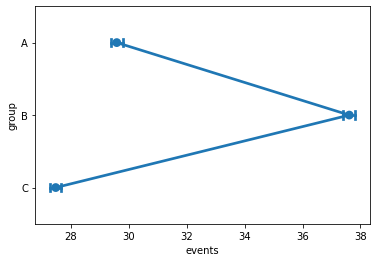

In [27]:
sns.pointplot(x='events', y='group', data=df1, capsize=0.1)
# Вывод среднего значения events для каждой группы

In [29]:
df2 = pd.read_csv('5_task_2.csv')

In [30]:
df2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


/Users/arkadijorehov/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='events', ylabel='Density'>

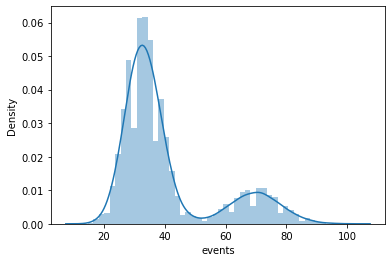

In [31]:
sns.distplot(df2[df2.group == 'test'].events)

In [38]:
df2.groupby(['group', 'segment'], as_index=False).agg({'events': np.std})

,group,segment,events
0,control,high,7.805347
1,control,low,4.473576
2,test,high,8.403974
3,test,low,5.720845


In [40]:
(150 - 3.66 * 10 - 0.82 * 8 - 7.68) / 7.62

13.013123359580051

In [41]:
68.7 - 90 * 0.57 - 80 * 0.05 - 50 * 0.06

10.400000000000006